# **Step 1 : Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from tabulate import tabulate

import warnings as warn
from warnings import filterwarnings

filterwarnings("ignore")

# **Step 2 : Read Dataset**

In [4]:
data = pd.read_csv("IRIS.csv")
df = pd.DataFrame(data)

In [5]:
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# **Step 3 : Dataset Overview**

In [6]:
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

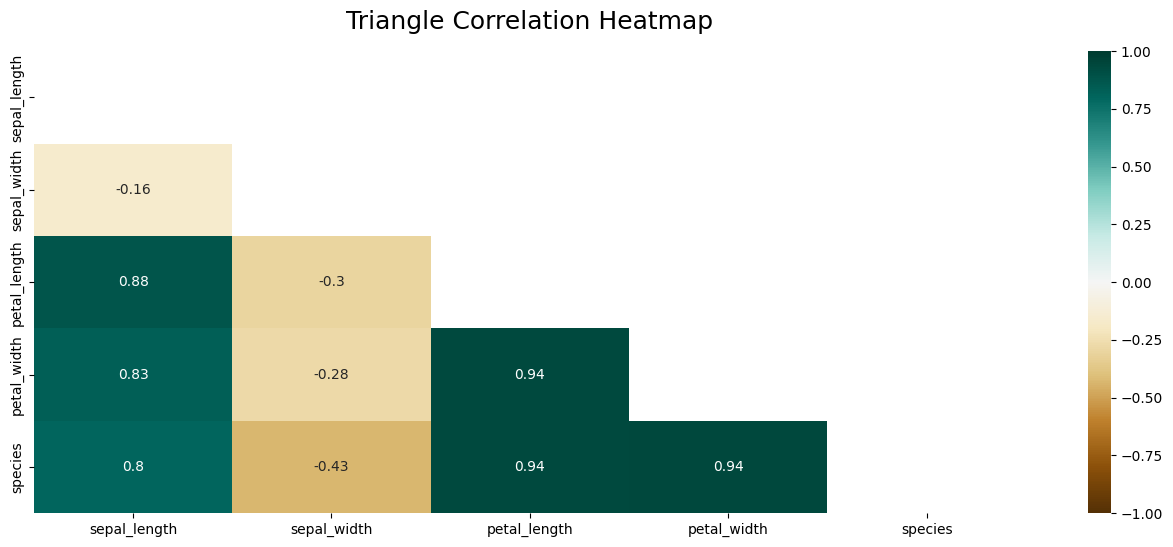

In [7]:
plt.figure (figsize = (16 , 6))

mask = np.triu(np.ones_like(df.corr(method = "spearman") , dtype = bool))
heatmap = sns.heatmap(df.corr(method = "spearman") , mask = mask , vmin = -1 , vmax = 1 ,
                      annot = True , cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap" , fontdict = {'fontsize': 18} , pad =16 )

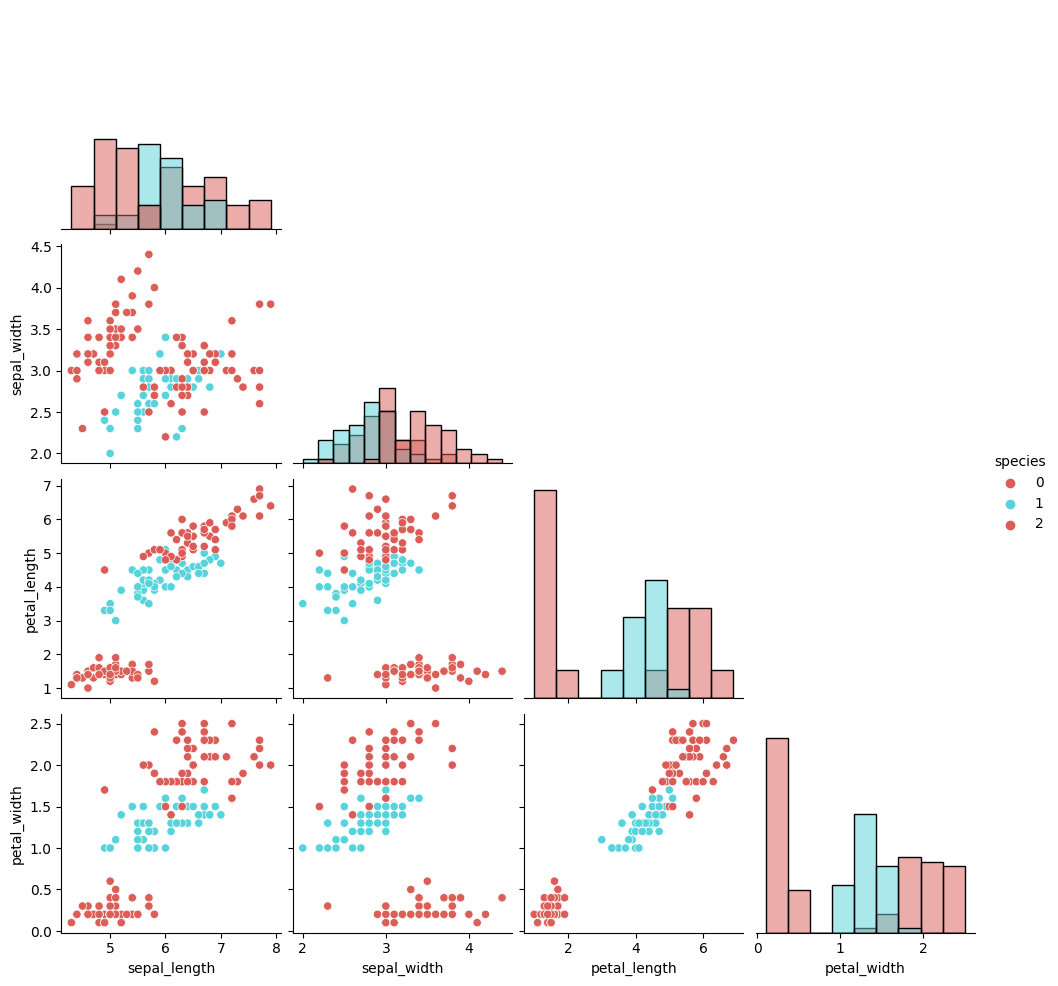

In [8]:
sns.pairplot(df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls')

# **Step 4 : Data science & Visualization**

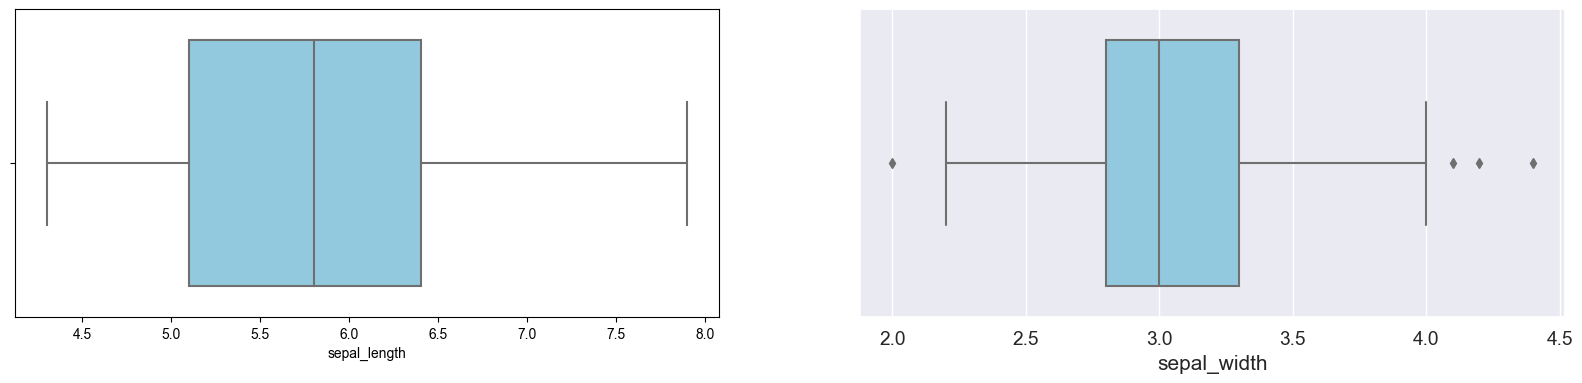

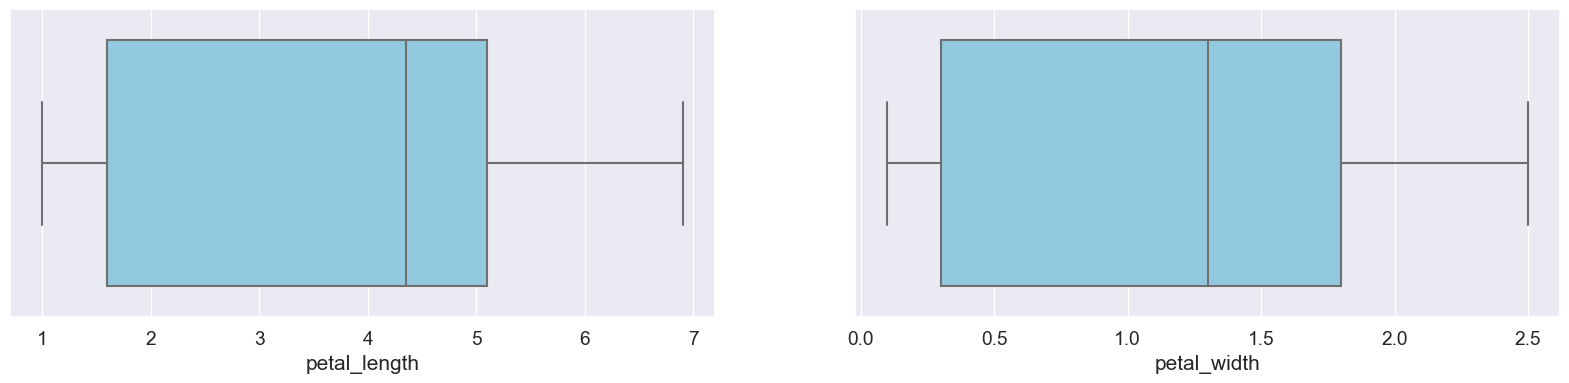

In [9]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    fig = plt.figure (figsize = [20 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()

<Axes: xlabel='species', ylabel='count'>

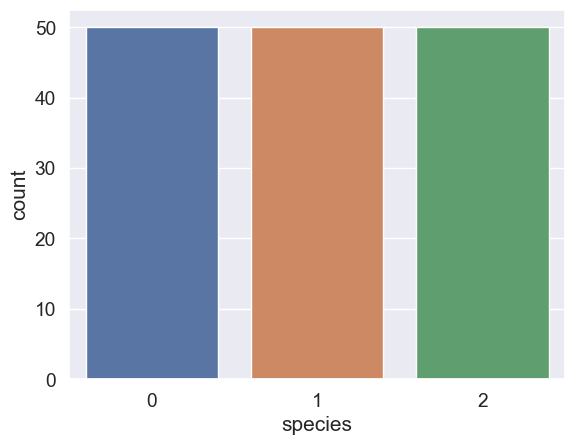

In [10]:
sns.countplot(x = df['species'] , data = df)

# **Step 5 : Models**

In [11]:
X = pd.DataFrame(df , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
y = df["species"].values.reshape(-1,1)

In [12]:
Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform(df)
Norm1_df=pd.DataFrame (Norm1 , columns = ["species" , "sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
Norm1_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.5 , random_state = 0)

In [14]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

# **Decision Tree**

In [15]:
DT = DecisionTreeClassifier(max_depth = 3)
DT = DT.fit(X_train , y_train)
y_pred_DT = DT.predict(X_test)
print("Decision Tree : ")
Evaluate_Performance(DT, X_train, X_test, y_train, y_test)

Decision Tree : 


NameError: name 'cross_val_score' is not defined

In [ ]:
DT_r = cross_val_score (DT, X, y, cv = 10)
D = np.std(DT_r)
print(D)

In [ ]:
cm = confusion_matrix (y , DT.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

In [ ]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree (DT , feature_names = F , class_names = T , filled = True)